<a href="https://colab.research.google.com/github/cszafariqbal/Time_Series_Projects/blob/main/Stock_Price_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#upload dataset into google colab

In [ ]:
# upload dataset in google colab
from google.colab import files
uploaded = files.upload()

Saving sp500.csv to sp500.csv


#import library

In [ ]:
from scipy import sparse
from ast import parse
import pandas as pd
import numpy as np

sp_file = pd.read_csv('sp500.csv', index_col='Date')
sp_file.head()

,Open,High,Low,Close,Volume
Date,,,,,
3/1/2000,1469.250000,1478.000000,1438.359985,1455.219971,931800000
4/1/2000,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
5/1/2000,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
6/1/2000,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
7/1/2000,1403.449951,1441.469971,1400.729980,1441.469971,1225200000


In [ ]:
sp_file.head()

,Open,High,Low,Close,Volume
Date,,,,,
3/1/2000,1469.250000,1478.000000,1438.359985,1455.219971,931800000
4/1/2000,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
5/1/2000,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
6/1/2000,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
7/1/2000,1403.449951,1441.469971,1400.729980,1441.469971,1225200000


In [ ]:
sp_file.tail()

,Open,High,Low,Close,Volume
Date,,,,,
27-08-18,2884.689941,2898.250000,2884.689941,2896.739990,2854080000
28-08-18,2901.449951,2903.770020,2893.500000,2897.520020,2683190000
29-08-18,2900.620117,2916.500000,2898.399902,2914.040039,2791860000
30-08-18,2908.939941,2912.459961,2895.219971,2901.129883,2802180000
31-08-18,2898.370117,2906.320068,2891.729980,2901.520020,2880260000


In [ ]:
sp_df = sp_file.copy()

In [ ]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4697 entries, 3/1/2000 to 31-08-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4697 non-null   float64
 1   High    4697 non-null   float64
 2   Low     4697 non-null   float64
 3   Close   4697 non-null   float64
 4   Volume  4697 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 220.2+ KB


In [ ]:
sp_df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
sp_df.describe()

,Open,High,Low,Close,Volume
count,4697.000000,4697.000000,4697.000000,4697.000000,4.697000e+03
mean,1482.568296,1491.141438,1473.341761,1482.764537,3.053978e+09
std,487.313638,487.480250,487.187033,487.468657,1.508356e+09
min,679.280029,695.270020,666.789978,676.530029,3.560700e+08
25%,1139.930054,1147.459961,1131.810059,1139.930054,1.593820e+09
50%,1330.290039,1338.209961,1321.890015,1329.780029,3.152470e+09
75%,1806.550049,1811.079956,1801.349976,1807.229980,3.920750e+09
max,2908.939941,2916.500000,2898.399902,2914.040039,1.145623e+10


In [ ]:
sp_df.duplicated().sum()

0

#Plot Trend and season

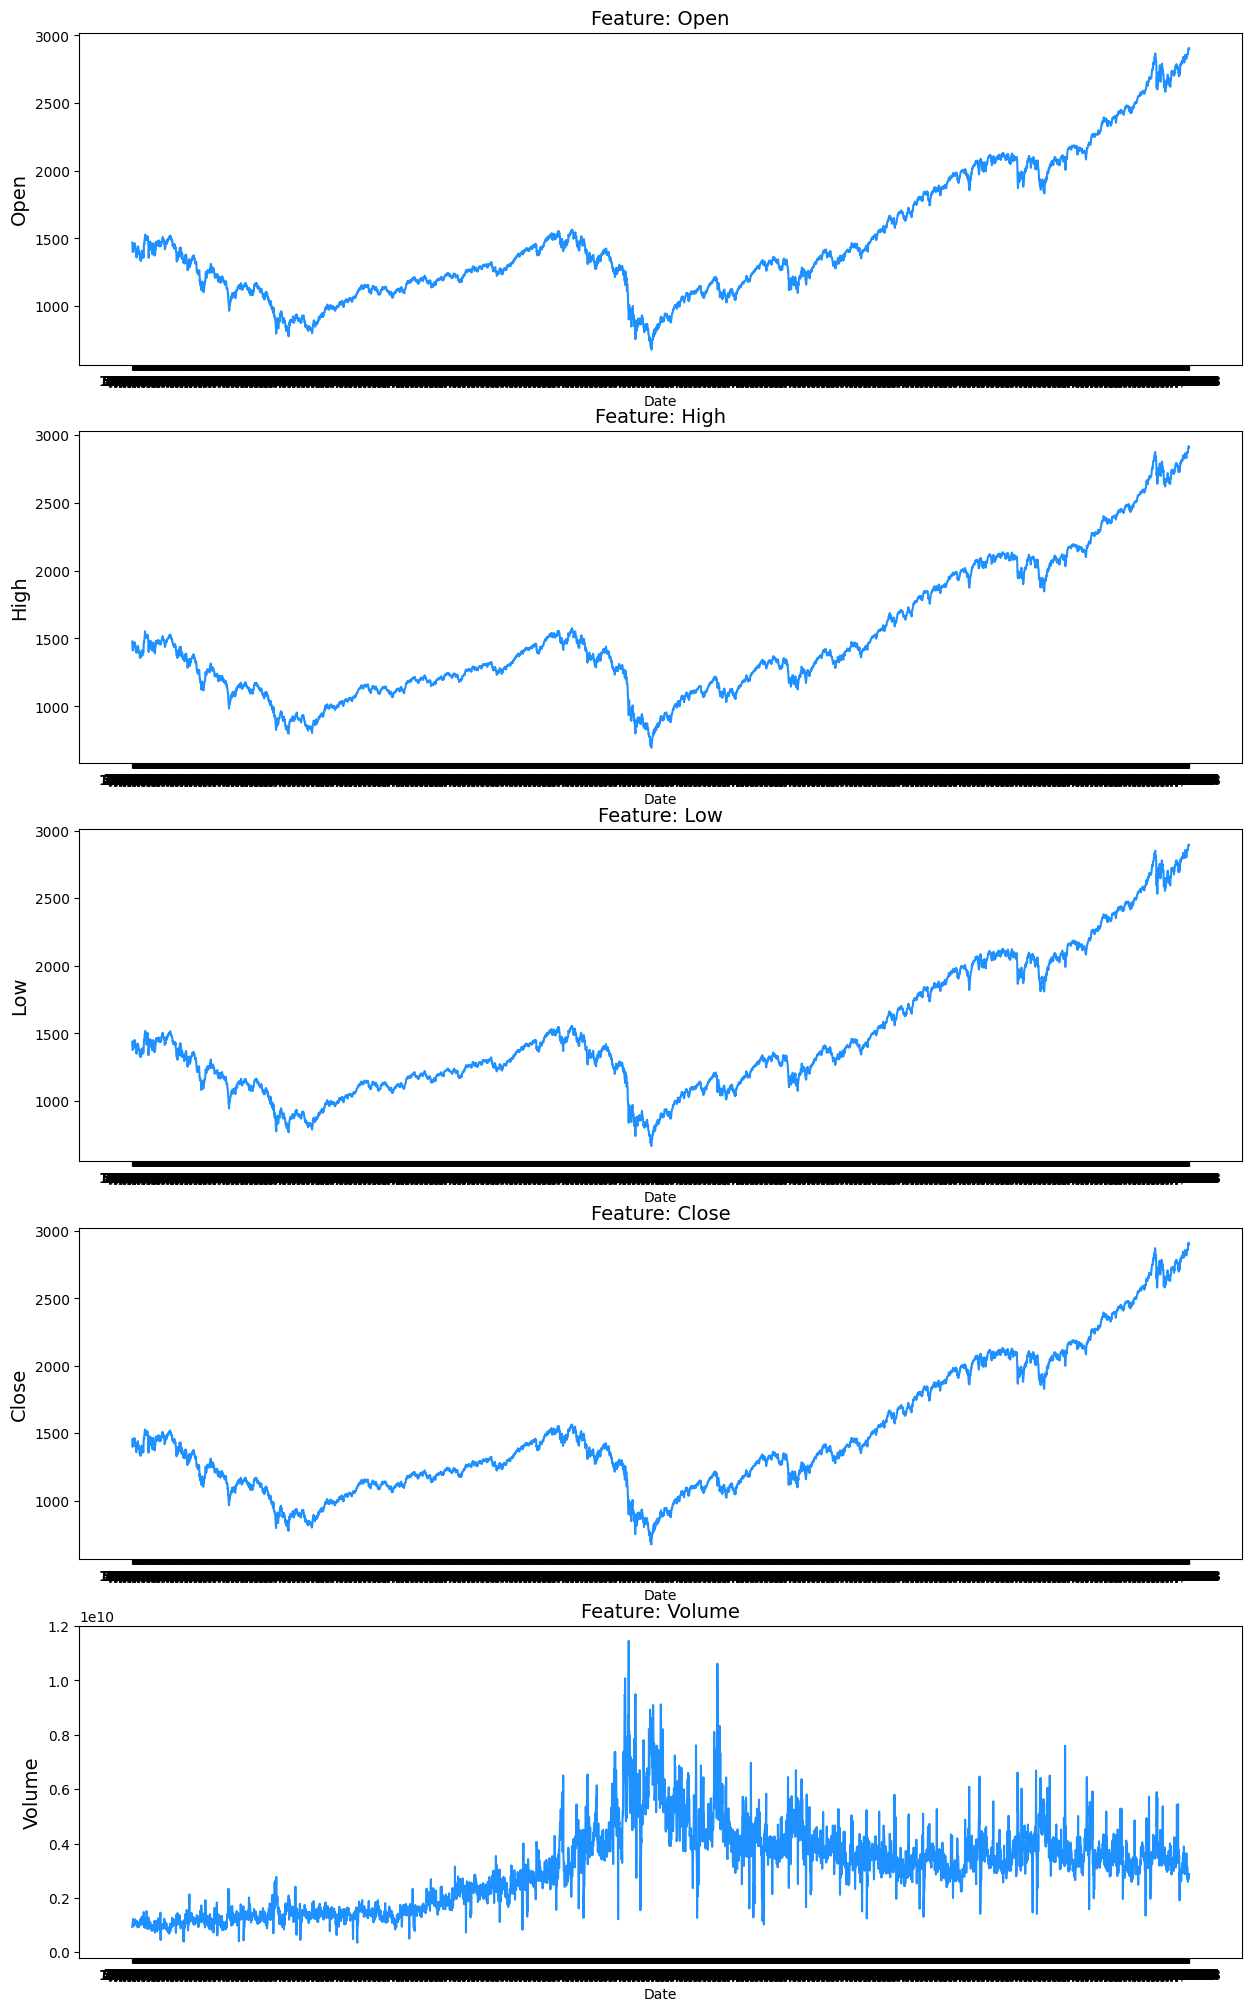

In [ ]:
# To compelte the data, as naive method, we will use ffill
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, date

f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(sp_df.columns):
  # print(i, column)
    sns.lineplot(x=sp_df.index, y=sp_df[column], ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    # ax[i].set_xlim([date(2000,1, 3), date(2018, 8, 31)])

In [ ]:
data_open = sp_df[['Open']]
data_close = sp_df[['Close']]
data_high = sp_df[['High']]
data_low = sp_df[['Low']]


In [ ]:
data_open

,Open
Date,
3/1/2000,1469.250000
4/1/2000,1455.219971
5/1/2000,1399.420044
6/1/2000,1402.109985
7/1/2000,1403.449951
...,...
27-08-18,2884.689941
28-08-18,2901.449951
29-08-18,2900.620117


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

#plot Autocorrelation

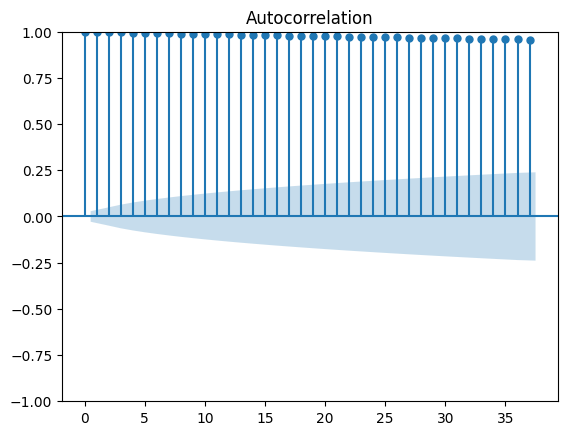

In [ ]:
# plot_acf
plot_acf(data_open)
plt.show()

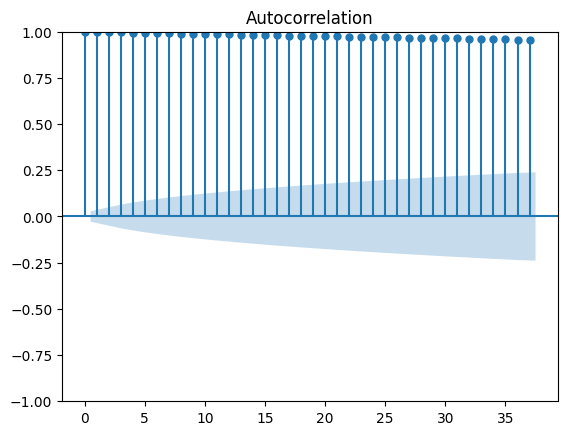

In [ ]:
# plot_acf
plot_acf(data_close)
plt.show()

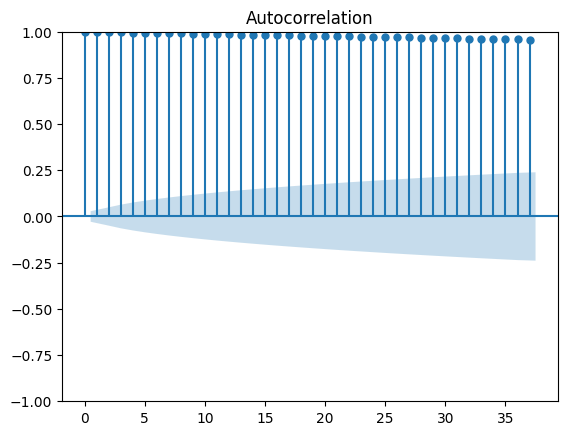

In [ ]:
# plot_acf
plot_acf(data_high)
plt.show()

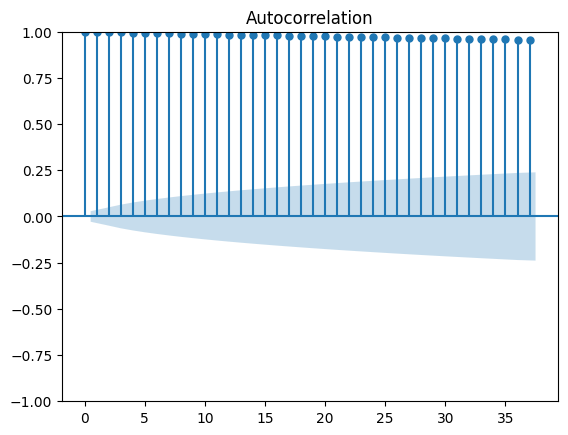

In [ ]:
# plot_acf
plot_acf(data_low)
plt.show()

#plot Partial Autocorrelation

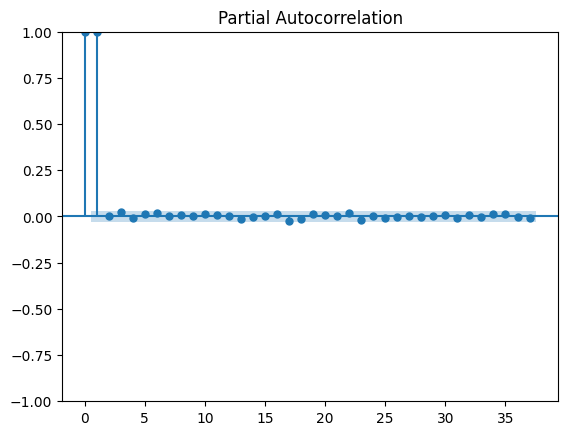

In [ ]:
# plot_pacf
plot_pacf(data_open)
plt.show()

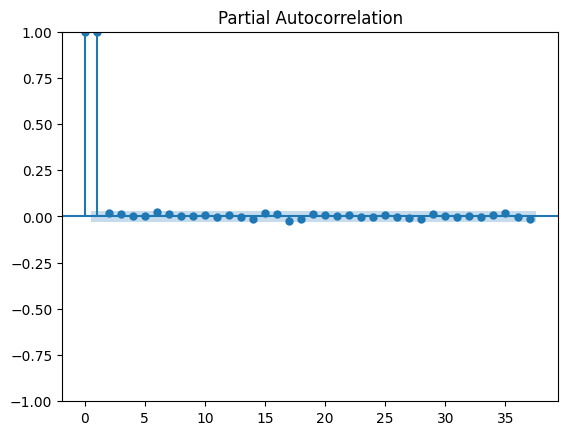

In [ ]:
# plot_pacf
plot_pacf(data_close)
plt.show()

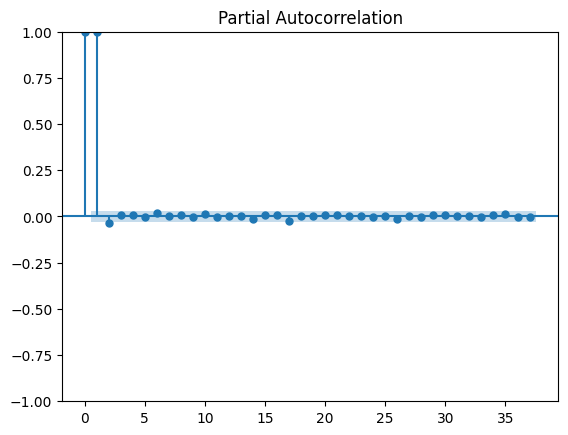

In [ ]:
# plot_pacf
plot_pacf(data_high)
plt.show()

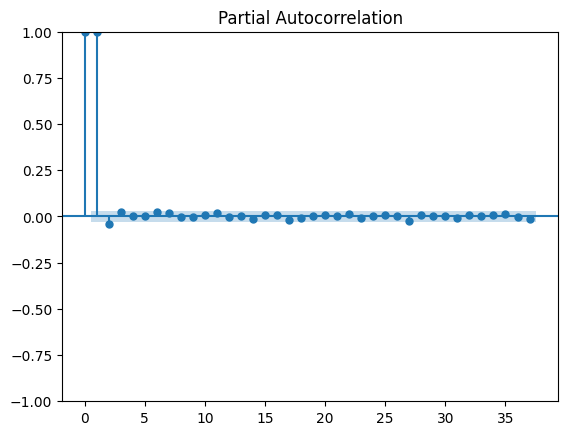

In [ ]:
# plot_pacf
plot_pacf(data_low)
plt.show()

#Plot seasonal factor

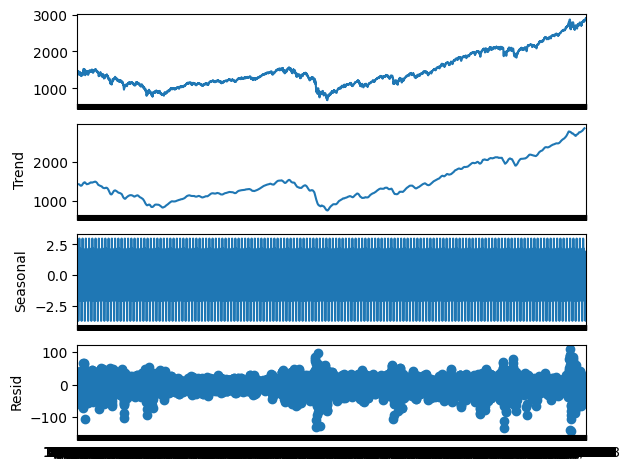

In [ ]:
# see seasonal factor by plot
result = seasonal_decompose(data_open, model='addative',period=30)
result.plot()
plt.show()

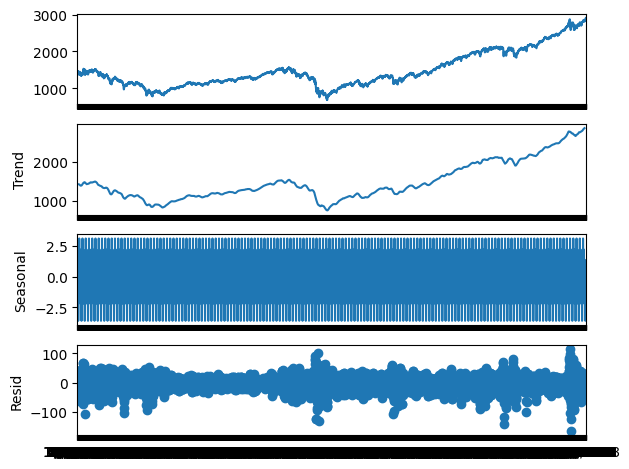

In [ ]:
# see seasonal factor by plot
result = seasonal_decompose(data_close, model='addative',period=30)
result.plot()
plt.show()

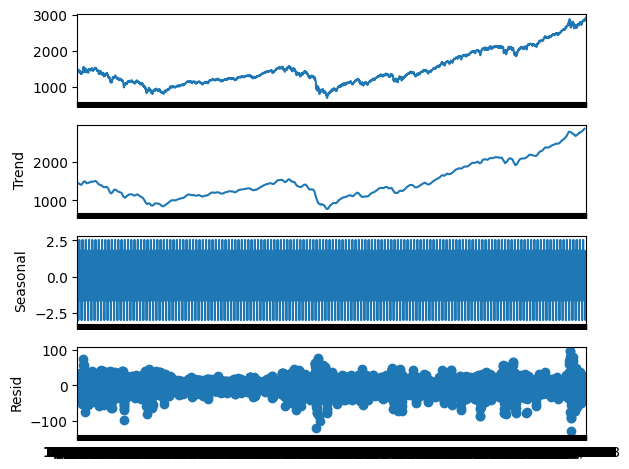

In [ ]:
# see seasonal factor by plot
result = seasonal_decompose(data_high, model='addative',period=30)
result.plot()
plt.show()

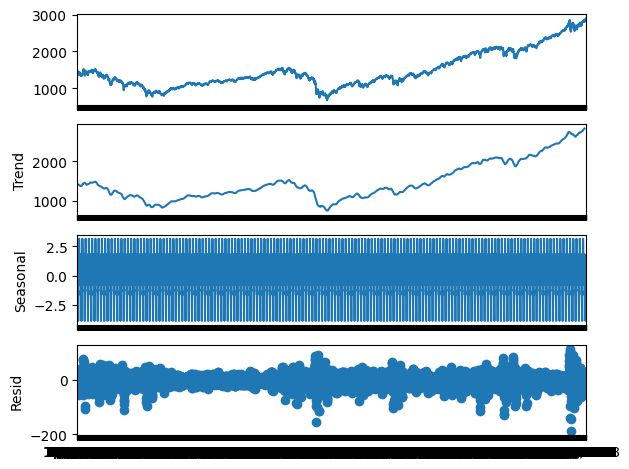

In [ ]:
# see seasonal factor by plot
result = seasonal_decompose(data_low, model='addative',period=30)
result.plot()
plt.show()

In [ ]:
x = data_open.values
split = round(len(x)/2)
x1 = x[0:split]
x2 = x[split:]
print("Mean1 =%f" % x1.mean())
print("Mean2 =%f" % x2.mean())
print("Variance1 =%f" % x1.var())
print("Variance2 =%f" % x2.var())

Mean1 =1199.847658
Mean2 =1765.168577
Variance1 =39241.321554
Variance2 =275762.504438


#check the series are stationary or not stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(x)
print("ADF Statistics: %f" % results[0])
print("p-value: %f" % results[1])
print("Critical Values: ")
for key , values in results[4].items():
  print( "\t%s: %f" % (key , values))
if (results[1]>0.05):
  print("Series is not stationary")
else:
  print("Series is stationary")

ADF Statistics: 1.521404
p-value: 0.997602
Critical Values: 
	1%: -3.431749
	5%: -2.862158
	10%: -2.567099
Series is not stationary


#kpss testing by checking series are stationary or not stationary

In [ ]:
# kpss test
results = kpss(x)
print("ADF Statistics: %f" % results[0])
print("p-value: %f" % results[1])
print("Critical Values: ")
for key , values in results[3].items():
  print( "\t%s: %f" % (key , values))
if (results[1]<0.05):
  print("Series is not stationary")
else:
  print("Series is stationary")

ADF Statistics: 7.375546
p-value: 0.010000
Critical Values: 
	10%: 0.347000
	5%: 0.463000
	2.5%: 0.574000
	1%: 0.739000
Series is not stationary


<ipython-input-30-cbb88beae8e1>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  results = kpss(x)


#Split the dataset into train and test

In [ ]:
# split data for open
split = int(len(data_open) * 0.8)
train_open, test_open = data_open.iloc[:split], data_open.iloc[split:]

In [ ]:
len(train_open), len(test_open)

(3757, 940)

In [ ]:
# split data for close
train_close, test_close = data_close.iloc[:split], data_close.iloc[split:]

In [ ]:
# split data for High
train_high, test_high = data_high.iloc[:split], data_high.iloc[split:]

In [ ]:
# split data for low
train_low, test_low = data_low.iloc[:split], data_low.iloc[split:]

#create ARIMA model

In [ ]:
# model ariam without seasonal factor
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data_open,order=(1,1,2))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

#check root mean squre error

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions = results.predict(start=len(train_open+1), end= len(train_open)+len(test_open)-1, dynamic=False)
rmse = sqrt(mean_squared_error(test_open, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 17.101


In [ ]:
# model ariam with seasonal factor
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data_open,order=(1,1,2), seasonal_order=(1,1,2,90))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
predictions = results.predict(start=len(train_open+1), end= len(train_open)+len(test_open)-1, dynamic=False)
rmse = sqrt(mean_squared_error(test_open, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 17.188
